**Step 1  & 2 :** **Load Your Dataset and create Data Frame **

In [0]:

print("Name: Hemanth Tarra| Reg No: 2023MCS320004 HEMANTH TARRA")

import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


Name: Hemanth Tarra| Reg No: 2023MCS320004 HEMANTH TARRA


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Step 3: Train a Simple Model**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2838.2448984085727
R^2 Score: 0.4720636694530932
Mean Absolute Error: 43.17108873968525


**Step 4: Log with MLflow**


In [0]:
import mlflow
import mlflow.sklearn

with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")
    mlflow.log_metric("mse", mse)
    mlflow.log_param("model_type", "LinearRegression")


2025/05/23 14:09:06 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.15.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.
2025/05/23 14:09:07 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/05/23 14:09:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run trusting-goat-625 at: adb-2405670454508090.10.azuredatabricks.net/ml/experiments/3739556790357431/runs/4d4301a96eff4aefacf1fb2121723cbe.
2025/05/23 14:09:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: adb-2405670454508090.10.azuredatabricks.net/ml/experiments/3739556790357431.


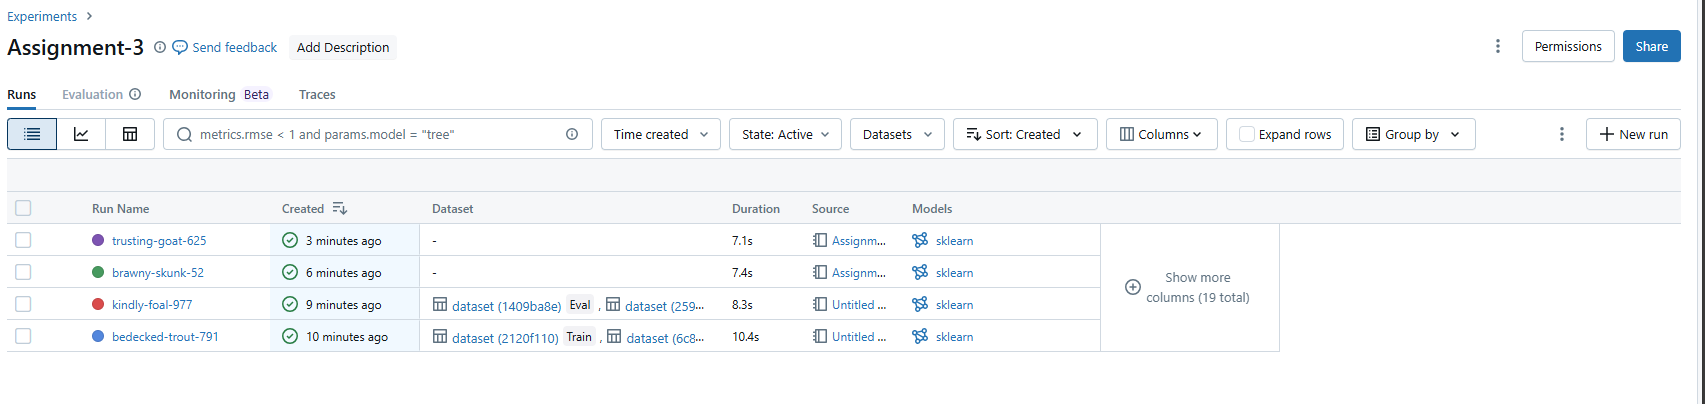

This is how the Experiment Run tracking looks like with all the runs

Working on each expirment - Metrics and the Artifacts

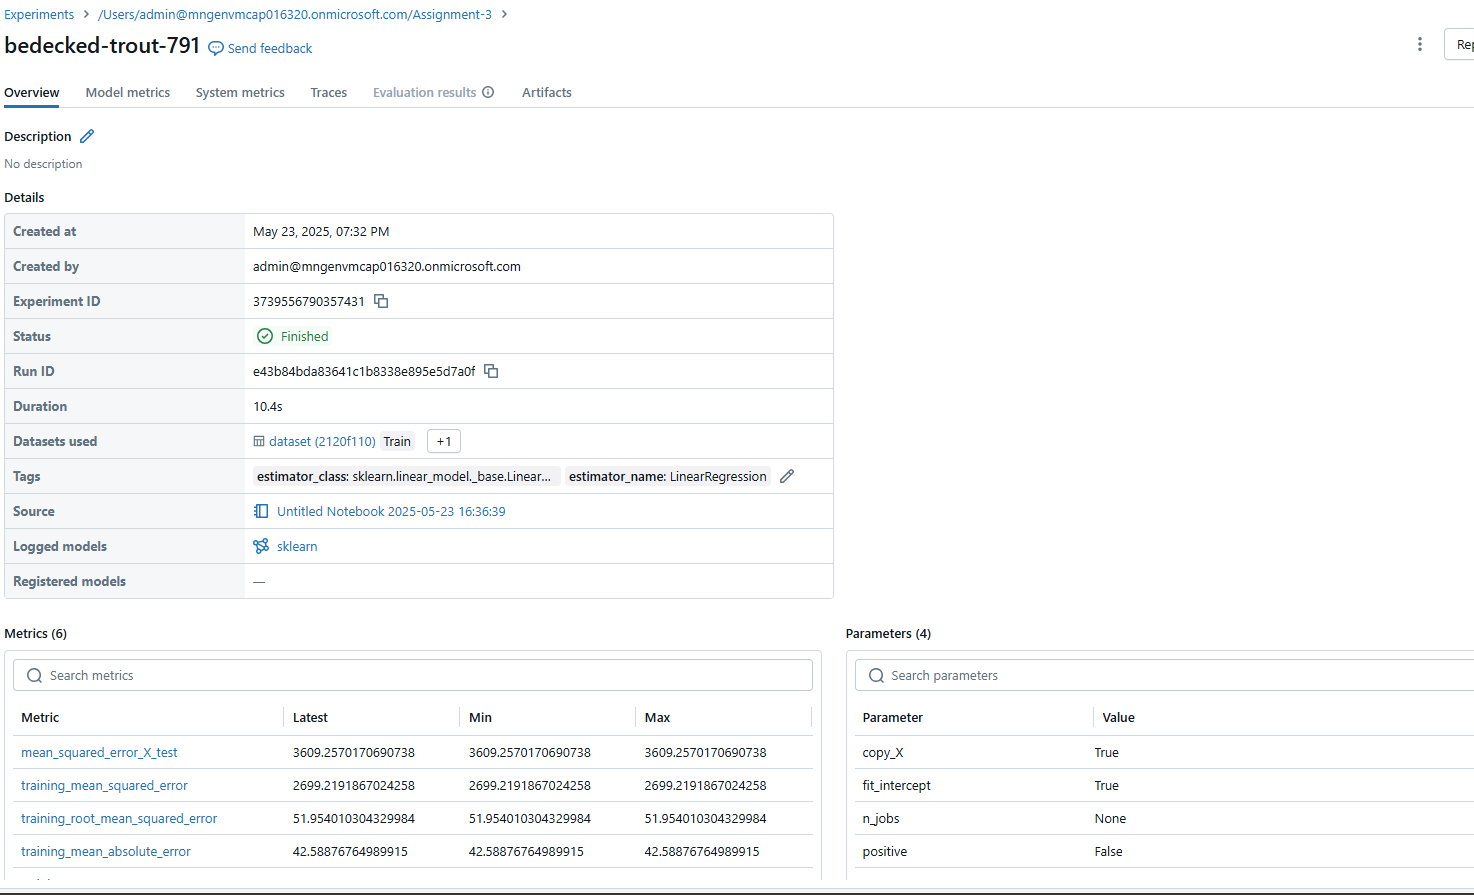

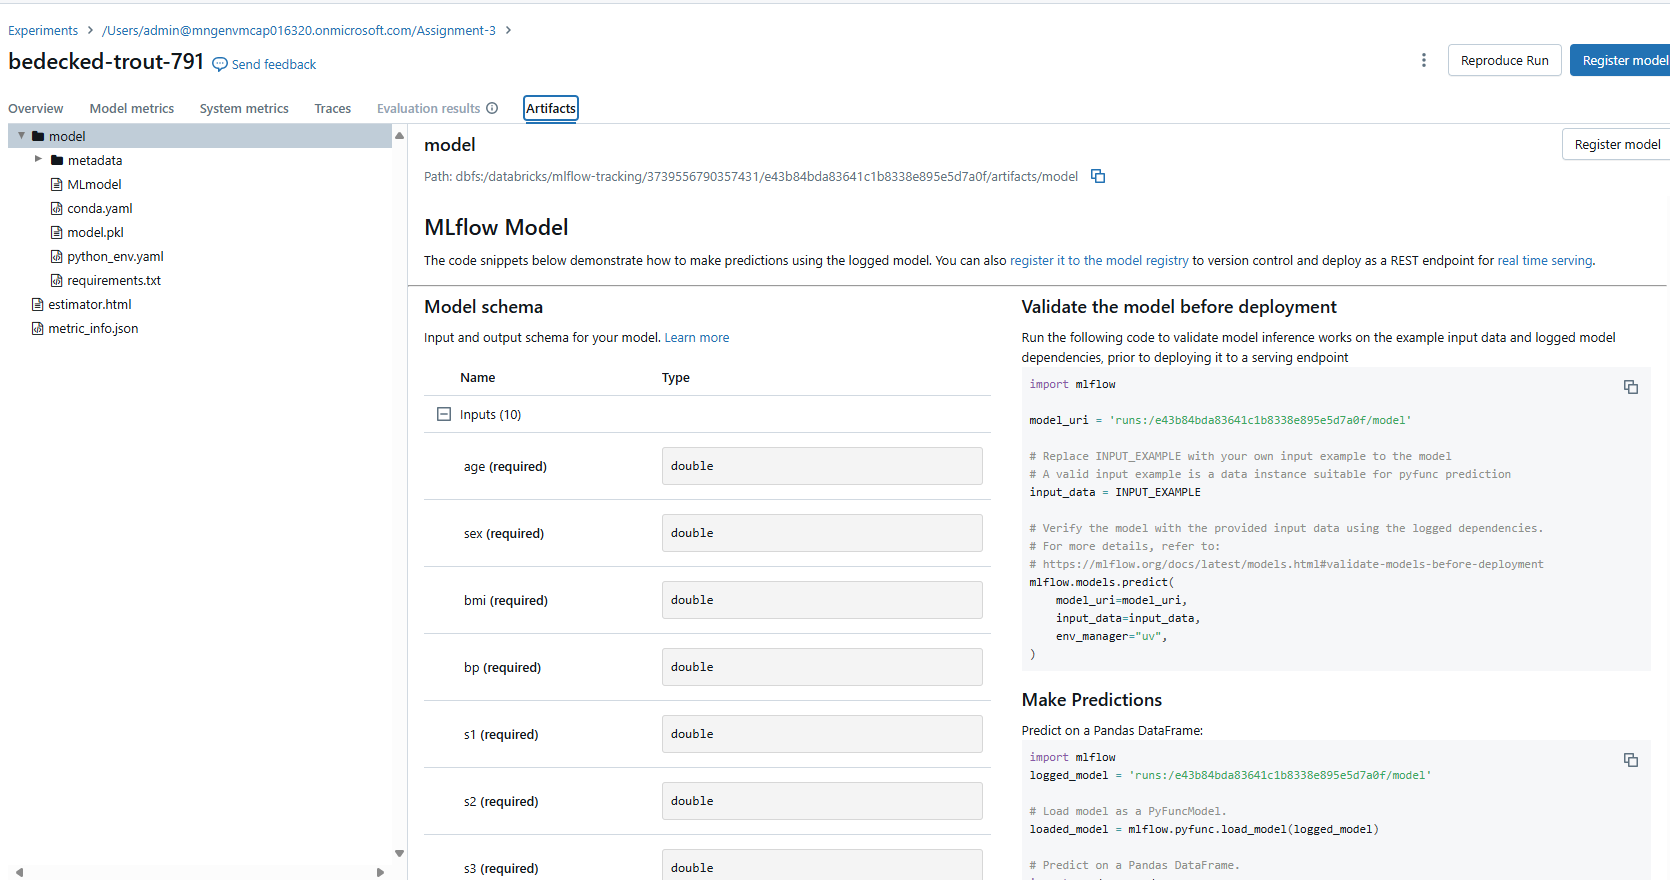